In [1]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=ea577957fac4970d7ac87c1dfd2fc601fd5f8d964b087823e9b8af7cf20250fb
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=d75e0b09a83061256b8669571bd3fb90324be1e7feacbba5a130dd86e1f84fd8
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [36]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541504 sha256=f65f7a4f3314cdba950940d41f3b13508dd73f903a612094131c6450293ab229
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan


In [52]:
import umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
import hdbscan
from hdbscan import flat
%matplotlib inline

In [38]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
data=pd.read_csv('winemag-data-130k-v2.csv')
data.head(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [58]:
data1=data[['country', 'price', 'variety']].copy()
data1.head(10)

,country,price,variety
0,Italy,NaN,White Blend
1,Portugal,15.0,Portuguese Red
2,US,14.0,Pinot Gris
3,US,13.0,Riesling
4,US,65.0,Pinot Noir
5,Spain,15.0,Tempranillo-Merlot
6,Italy,16.0,Frappato
7,France,24.0,Gewürztraminer
8,Germany,12.0,Gewürztraminer
9,France,27.0,Pinot Gris


In [59]:
data1.isna().any()

country    True
price      True
variety    True
dtype: bool

In [60]:
data1['price']=data1['price'].fillna(data1['price'].mean())
data1.isna().any()

country     True
price      False
variety     True
dtype: bool

In [61]:
data1=data1.dropna()
data1.isna().any()

country    False
price      False
variety    False
dtype: bool

In [62]:
data1.describe()

,price
count,129907.000000
mean,35.368422
std,39.585650
min,4.000000
25%,18.000000
50%,28.000000
75%,40.000000
max,3300.000000


In [63]:
a=data1['country'].unique().tolist()
b=data1['variety'].unique().tolist()
c=[i for i in range(len(a))]
d=[i for i in range(len(b))]
data1['country'] = data1['country']. replace(a, c)
data1['variety'] = data1['variety']. replace(b, d)
data1

,country,price,variety
0,0,35.363389,0
1,1,15.000000,1
2,2,14.000000,2
3,2,13.000000,3
4,2,65.000000,4
...,...,...,...
129966,5,28.000000,3
129967,2,75.000000,4
129968,4,30.000000,7
129969,4,32.000000,2


In [64]:
reducer = umap.UMAP(random_state=42)

In [65]:
data1_value=data1[['country', 'variety', 'price']].values
scaled_normal_data = StandardScaler().fit_transform(data1_value)
embedding=reducer.fit_transform(scaled_normal_data)

<ipython-input-66-5f2ec16c4c32>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=2, cmap='Spectral');


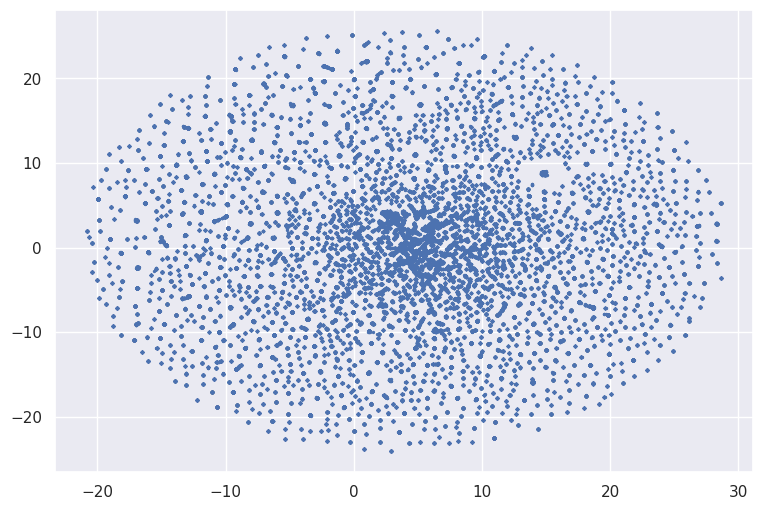

In [66]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=2, cmap='Spectral');

In [31]:
inertia = [] # сюда будем сохранять значения
for i in range(15, 21): # значения интервала - число кластеров (можно изменять) 
    kmeans = cluster.KMeans( n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=42) # сколько раз датасет перемешан перед кластеризацией
    
    
    kmeans.fit(embedding) # обучаем модель
    inertia.append(kmeans.inertia_) # добавляем значения инерции для каждого числа кластеров
    
print(inertia)

[2565426.5, 2397874.0, 2246940.75, 2105696.0, 2008296.5, 1907100.25]


In [32]:
silhouette = {}
for i in range(15,21):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=42)
    kmeans.fit(embedding)
    
    silhouette[i] = silhouette_score(embedding, kmeans.labels_, metric='euclidean')

print(silhouette)

{15: 0.3322118, 16: 0.3369895, 17: 0.33836946, 18: 0.3394563, 19: 0.33584538, 20: 0.33522293}


In [67]:
kmeans = cluster.KMeans(n_clusters=20,random_state=42,init='k-means++')

kmeans_labels = kmeans.fit_predict(embedding)
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids = kmeans.cluster_centers_

display(pd.Series(kmeans_labels).value_counts()) 
kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12    10951
16     7593
4      7295
3      7211
10     7137
13     7103
9      6992
1      6870
15     6808
0      6599
8      6077
11     5831
5      5768
14     5655
2      5527
19     5446
17     5429
18     5301
6      5298
7      5016
dtype: int64

array([ 7,  3,  2, ..., 19, 18, 19], dtype=int32)

In [68]:
data1['Номер кластера']=kmeans_labels
data1

,country,price,variety,Номер кластера
0,0,35.363389,0,7
1,1,15.000000,1,3
2,2,14.000000,2,2
3,2,13.000000,3,9
4,2,65.000000,4,2
...,...,...,...,...
129966,5,28.000000,3,9
129967,2,75.000000,4,2
129968,4,30.000000,7,19
129969,4,32.000000,2,18


In [69]:
data1['country'] = data1['country']. replace(c, a)
data1['variety'] = data1['variety']. replace(d, b)
data1

,country,price,variety,Номер кластера
0,Italy,35.363389,White Blend,7
1,Portugal,15.000000,Portuguese Red,3
2,US,14.000000,Pinot Gris,2
3,US,13.000000,Riesling,9
4,US,65.000000,Pinot Noir,2
...,...,...,...,...
129966,Germany,28.000000,Riesling,9
129967,US,75.000000,Pinot Noir,2
129968,France,30.000000,Gewürztraminer,19
129969,France,32.000000,Pinot Gris,18


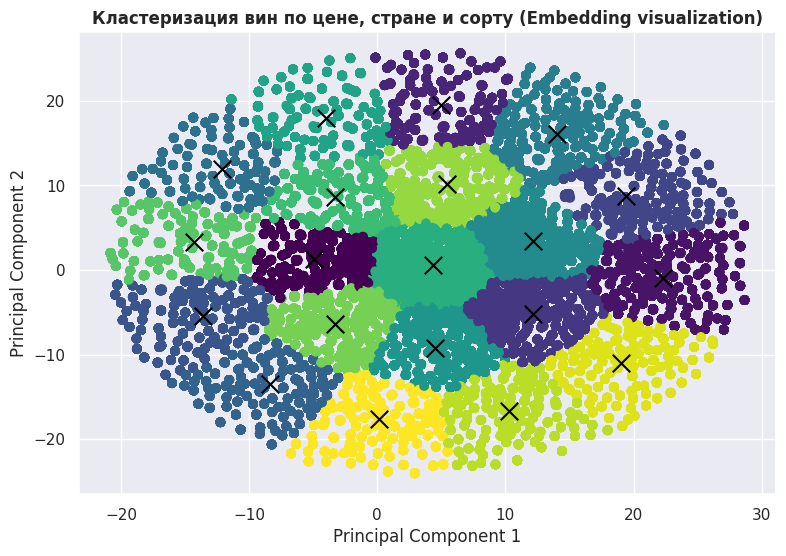

In [70]:
sns.set( rc={'figure.figsize':(9,6)},font_scale=1)

plt.scatter(x=embedding[:, 0], y=embedding[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=160, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# добавить легенду

plt.title('Кластеризация вин по цене, стране и сорту (Embedding visualization)',fontweight='bold')
plt.show()